<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-4/blob/main/decision_tree_and_random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
dataset_path = 'housing.csv'
df = pd.read_csv(dataset_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [5]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(
    df[categorical_cols]
)
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [6]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [8]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [9]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [17]:
regressor = DecisionTreeRegressor(random_state=random_state,
                                  #max_depth=5
                                  )
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

[Text(0.6118396891909029, 0.975, 'x[0] <= 0.371\nsquared_error = 0.929\nsamples = 381\nvalue = 0.005'),
 Text(0.41203539799628003, 0.925, 'x[2] <= 0.426\nsquared_error = 0.46\nsamples = 249\nvalue = -0.382'),
 Text(0.5119375435935914, 0.95, 'True  '),
 Text(0.30268087377409536, 0.875, 'x[11] <= 0.566\nsquared_error = 0.33\nsamples = 201\nvalue = -0.531'),
 Text(0.16692382482245519, 0.825, 'x[0] <= -0.672\nsquared_error = 0.303\nsamples = 120\nvalue = -0.362'),
 Text(0.05937182955698343, 0.775, 'x[5] <= -1.03\nsquared_error = 0.205\nsamples = 53\nvalue = -0.611'),
 Text(0.03652350355089618, 0.725, 'x[0] <= -0.828\nsquared_error = 0.257\nsamples = 16\nvalue = -0.847'),
 Text(0.02434900236726412, 0.675, 'x[1] <= 1.403\nsquared_error = 0.138\nsamples = 12\nvalue = -1.021'),
 Text(0.021643557659790327, 0.625, 'x[3] <= -0.352\nsquared_error = 0.089\nsamples = 11\nvalue = -1.093'),
 Text(0.013527223537368955, 0.575, 'x[0] <= -1.082\nsquared_error = 0.111\nsamples = 5\nvalue = -1.269'),
 Text(

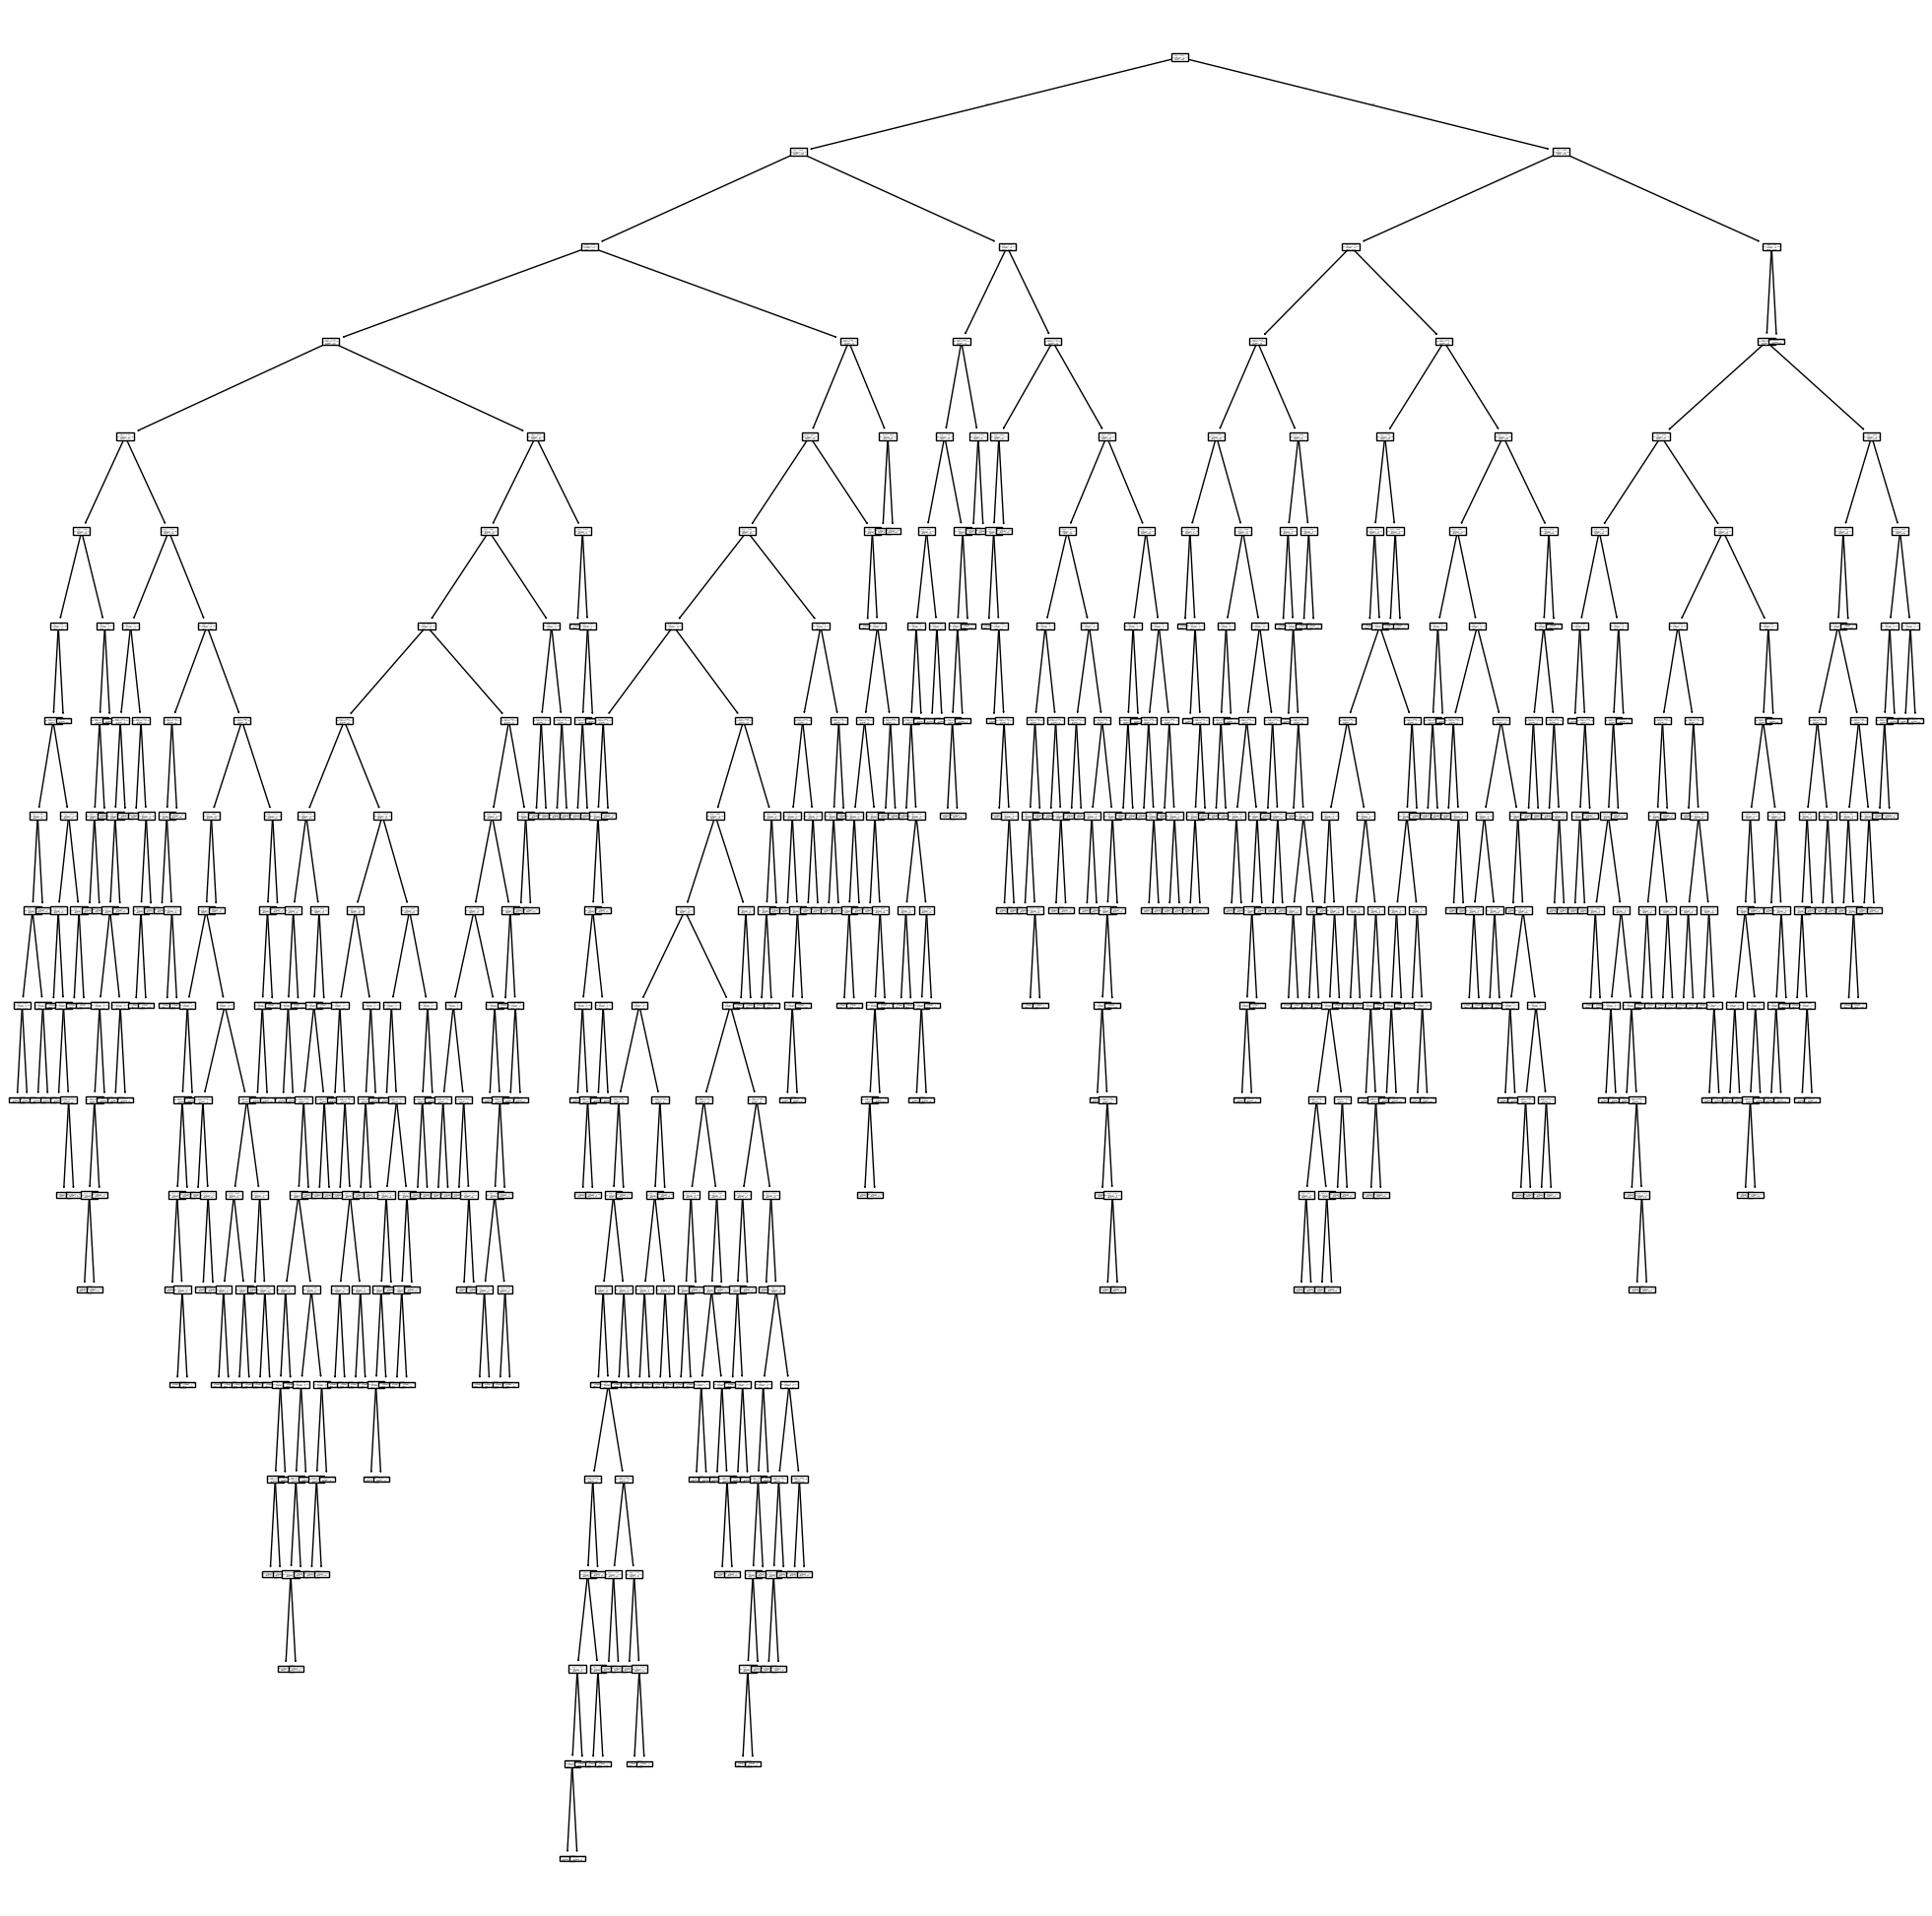

In [18]:
fig = plt.figure(figsize=(25, 25))
sklearn.tree.plot_tree(regressor)

In [13]:
regressor = RandomForestRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [19]:
y_pred = regressor.predict(X_val)

In [20]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.594233095728814
Mean Squared Error: 0.7245255619360014


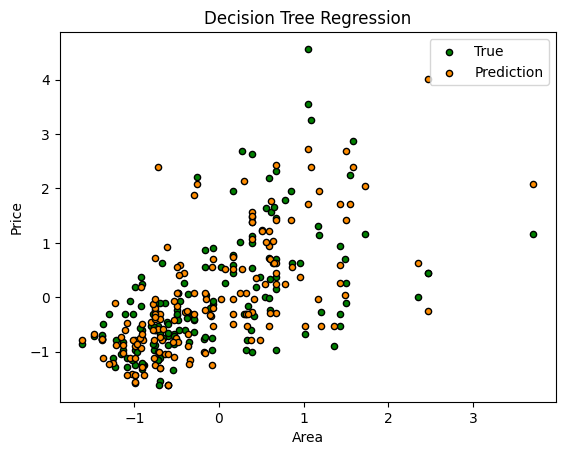

In [21]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()